In [ ]:
!pip install h5py

In [ ]:
from pathlib import Path
import h5py
import glob

In [ ]:
ruta1='/content/drive/MyDrive/database con directorios/train/ingles/*.png'
Direccion=glob.glob(ruta1)






In [ ]:
len(Direccion)

15272

In [ ]:
#Código para enumerar las imágenes y etiquetarlas
from random import shuffle as mezclar #Con esta libreria se mezclan los elementos de una lista de objetos
import glob # libreria global
Mezclar_Datos = True  #  explora (mezcla) las direcciones antes de guardar
path_guardar_HDF5 = '/content/drive/MyDrive/modelos/alemanvsall.hdf5'  # dirección a la que desea guardar el archivo hdf5
#path_datos_entrenamiento = '/content/drive/MyDrive/database final/*.png' # direccion donde estan los datos de entrenamiento

# código para leer los paths y las etiquetas etiquetas de la carpeta 'Entrenamiento' path_datos_entrenamiento
#Direccion = glob.glob(path_datos_entrenamiento)
Etiquetas = [1 if 'de' in Direc else 0 for Direc in Direccion]  # 1 = español, 0= otros




In [ ]:

# código pata mezclat los datos 
if Mezclar_Datos:
    c = list(zip(Direccion, Etiquetas))
   
    mezclar(c)
    Direccion, Etiquetas = zip(*c)
    
# Divide en 60% de entrenamiento, 20% de validación y 20% de prueba
Direccion_De_Entrenamiento= Direccion[0:int(0.7*len(Direccion))]


Etiquetas_De_Entrenamiento= Etiquetas[0:int(0.7*len(Etiquetas))]




Direccion_De_Prueba= Direccion[int(0.7*len(Direccion)):]

Etiquetas_De_Prueba = Etiquetas[int(0.7*len(Etiquetas)):]

#Archivo_HDF5.close()

print("Se enumeraron y se etiquetaron las imágenes de forma correcta") #Imprime mensasje

Se enumeraron y se etiquetaron las imágenes de forma correcta


In [ ]:
#Código para crear un archivo del tipo HDF5

import numpy as np
import tables as tabla
#import tensorflow as tf

Orden_De_Datos = 'tf'  

Tipo_De_Imagen = tabla.UInt8Atom()  

if Orden_De_Datos == 'th':
    Forma_De_Dato = (0, 3, 224, 224)
elif Orden_De_Datos == 'tf':
    Forma_De_Dato = (0, 224, 224, 3)

# abrir un archivo hdf5 y crear auriculares
Archivo_HDF5 = tabla.open_file(path_guardar_HDF5, mode='w')

Almacenamiento_de_entrenamiento = Archivo_HDF5.create_earray(Archivo_HDF5.root, 'Imagen_De_Entrenamiento', Tipo_De_Imagen, shape=Forma_De_Dato)

Almacenamiento_de_prueba = Archivo_HDF5.create_earray(Archivo_HDF5.root, 'Imagen_De_Prueba', Tipo_De_Imagen, shape=Forma_De_Dato)

Almacenamiento_Medio = Archivo_HDF5.create_earray(Archivo_HDF5.root, 'Medio_Entrenamiento', Tipo_De_Imagen, shape=Forma_De_Dato)

Archivo_HDF5.create_array(Archivo_HDF5.root, 'Etiquetas_De_Entrenamiento', Etiquetas_De_Entrenamiento)
Archivo_HDF5.create_array(Archivo_HDF5.root, 'Etiquetas_De_Prueba', Etiquetas_De_Prueba)

print("El archivo HDF5 se creó de forma correcta") #Imprime mensasje

El archivo HDF5 se creó de forma correcta


In [ ]:
#Código para cargar las imágenes y guardarlas

import cv2
# una matriz numpy para guardar la media de las imágenes
Media = np.zeros(Forma_De_Dato[1:], np.float32)

# ciclo para recorrer las direcciones de entrenamiento
for i in range(len(Direccion_De_Entrenamiento)):
    
    if i % 10 == 0 and i > 1:
        print ('Datos de Entrenamiento: {}/{}'.format(i, len(Direccion_De_Entrenamiento)))
  
    Direc = Direccion_De_Entrenamiento[i]
    
    Imagen= cv2.imread(Direc)
    Imagen = cv2.resize(Imagen, (224, 224), interpolation=cv2.INTER_CUBIC)
    Imagen = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
    
    if Orden_De_Datos == 'th':
        Imagen = np.rollaxis(Imagen, 2)

   
    Almacenamiento_de_entrenamiento.append(Imagen[None])
   
  
    Media += Imagen / float(len(Etiquetas_De_Entrenamiento))



# ciclo sobre las direcciones de test
for i in range(len(Direccion_De_Prueba)):
   
    if i % 10 == 0 and i > 1:
        print ('Datos de Prueba: {}/{}'.format(i, len(Direccion_De_Prueba)))
    
    Direc = Direccion_De_Prueba[i]
 
    Imagen = cv2.imread(Direc)
    Imagen = cv2.resize(Imagen, (224, 224), interpolation=cv2.INTER_CUBIC)
    Imagen = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)

    if Orden_De_Datos == 'th':
        Imagen = np.rollaxis(Imagen, 2)

    # guardar la imagen
    Almacenamiento_de_prueba.append(Imagen[None])
   
# guardar la media y cerrar el archivo hdf5

Archivo_HDF5.close()

print("Imagenes Guardadas con exito en Formato HDF5") #Imprime mensasje

print ('Total de Imagenes: {}'.format(len(Direccion_De_Prueba + Direccion_De_Entrenamiento)))


Datos de Entrenamiento: 10/10690
Datos de Entrenamiento: 20/10690
Datos de Entrenamiento: 30/10690
Datos de Entrenamiento: 40/10690
Datos de Entrenamiento: 50/10690
Datos de Entrenamiento: 60/10690
Datos de Entrenamiento: 70/10690
Datos de Entrenamiento: 80/10690
Datos de Entrenamiento: 90/10690
Datos de Entrenamiento: 100/10690
Datos de Entrenamiento: 110/10690
Datos de Entrenamiento: 120/10690
Datos de Entrenamiento: 130/10690
Datos de Entrenamiento: 140/10690
Datos de Entrenamiento: 150/10690
Datos de Entrenamiento: 160/10690
Datos de Entrenamiento: 170/10690
Datos de Entrenamiento: 180/10690
Datos de Entrenamiento: 190/10690
Datos de Entrenamiento: 200/10690
Datos de Entrenamiento: 210/10690
Datos de Entrenamiento: 220/10690
Datos de Entrenamiento: 230/10690
Datos de Entrenamiento: 240/10690
Datos de Entrenamiento: 250/10690
Datos de Entrenamiento: 260/10690
Datos de Entrenamiento: 270/10690
Datos de Entrenamiento: 280/10690
Datos de Entrenamiento: 290/10690
Datos de Entrenamiento:

**Código para acceder a los datos guardados en el archivo HDF5 creado con el código anterior**

In [ ]:
#Código para abrir el HDF5 y leerlo

import tables as tabla
import numpy as np

Direccion_Donde_Esta_El_Archivo_HDF5= path_guardar_HDF5
Media_Substraida = False

# se usa para abrir el archivo hdf5
Archivo_HDF5 = tabla.open_file(Direccion_Donde_Esta_El_Archivo_HDF5, mode='r')

# restar la media de entrenamiento
if Media_Substraida:
    media = Archivo_HDF5.root.train_mean[0]
    media = media[np.newaxis, ...]

# Número total de muestras
Numero_De_Dato = Archivo_HDF5.root.Imagen_De_Entrenamiento.shape[0]

print("El archivo hdf5 ha sido leido de forma correcta",Numero_De_Dato) #Imprime mensasje

El archivo hdf5 ha sido leido de forma correcta 9980


In [ ]:
# Load file:
data = h5py.File(path_guardar_HDF5, 'r')

# Print the keys of the file
for key in data.keys():
  print(key)



Etiquetas_De_Entrenamiento
Etiquetas_De_Prueba
Etiquetas_De_Validacion
Imagen_De_Entrenamiento
Imagen_De_Prueba
Imagen_De_Validacion
Medio_Entrenamiento


In [ ]:
def keys(f):
    return [key for key in f.keys()]

In [ ]:
k=keys(data)[1]
k

'Etiquetas_De_Prueba'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


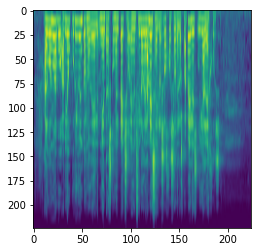

In [ ]:
images=data['Imagen_De_Entrenamiento'].value
#print(images[43])
plt.imshow(images[10])
plt.show()

In [ ]:
eti=data['Etiquetas_De_Entrenamiento'].value
print(len(eti))


44


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [ ]:
images_test=data['Imagen_De_Validacion'].value

eti2=data['Etiquetas_De_Validacion'].value
print(len(eti2),len(images_test))
images_test.shape

15 15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(15, 224, 224, 3)

In [ ]:
#data.close()